In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
import kagglehub

In [2]:
path = kagglehub.dataset_download("kmader/food41")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/food41


In [3]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [4]:
train_ds2 = image_dataset_from_directory(
    f"{path}/images",
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds2 = image_dataset_from_directory(
    f"{path}/images",
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 101000 files belonging to 101 classes.
Using 80800 files for training.
Found 101000 files belonging to 101 classes.
Using 20200 files for validation.


In [5]:
class_names = train_ds2.class_names
num_classes = len(class_names)
print(f"총 {num_classes}개의 클래스가 준비되었습니다.")

총 101개의 클래스가 준비되었습니다.


첫번째 학습

In [6]:
base_model = EfficientNetB0(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
base_model.trainable = False

In [8]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [9]:
model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [11]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
]

In [12]:
EPOCHS = 20
history = model.fit(
    train_ds2,
    validation_data=val_ds2,
    epochs=EPOCHS,
    callbacks=callbacks
)

Epoch 1/20
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 570s 215ms/step - accuracy: 0.4936 - loss: 2.2009 - val_accuracy: 0.6603 - val_loss: 1.3209
Epoch 2/20
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 201s 79ms/step - accuracy: 0.6805 - loss: 1.2276 - val_accuracy: 0.6824 - val_loss: 1.2284
Epoch 3/20
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 200s 79ms/step - accuracy: 0.7136 - loss: 1.0811 - val_accuracy: 0.6885 - val_loss: 1.2053
Epoch 4/20
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 201s 80ms/step - accuracy: 0.7358 - loss: 0.9920 - val_accuracy: 0.6935 - val_loss: 1.1883
Epoch 5/20
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 204s 81ms/step - accuracy: 0.7497 - loss: 0.9272 - val_accuracy: 0.6954 - val_loss: 1.1903
Epoch 6/20
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 265s 82ms/step - accuracy: 0.7641 - loss: 0.8825 - val_accuracy: 0.6981 - val_loss: 1.1893
Epoch 7/20
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 202s 80ms/step - accuracy: 0.7720 - loss: 0.8381 - val_accuracy: 0.6956 - val_loss: 1.1987
Epoch 8/20
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 200s 79ms/step - accuracy:

In [13]:
val_loss, val_acc=model.evaluate(val_ds2)

632/632 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.6942 - loss: 1.1881


In [14]:
print(f"테스트 데이터셋의 손실(Loss): {val_loss:.4f}")
print(f"테스트 데이터셋의 정확도(Accuracy): {val_acc:.4f}")

테스트 데이터셋의 손실(Loss): 1.1883
테스트 데이터셋의 정확도(Accuracy): 0.6935


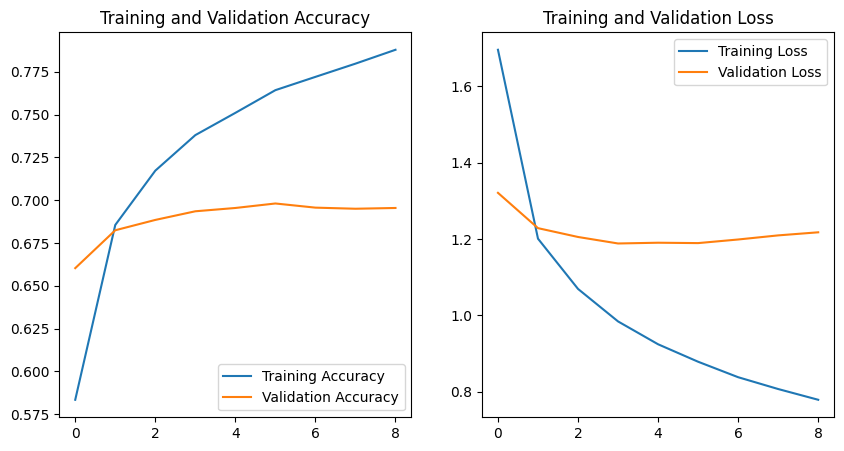

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('efficientnet1.png')
plt.show()

미세 조정

In [16]:
base_model = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks2 = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
]

In [17]:
history_fine_tune = model.fit(
    train_ds2,
    validation_data=val_ds2,
    epochs=50,
    callbacks=callbacks2
)

Epoch 1/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 234s 85ms/step - accuracy: 0.7569 - loss: 0.9070 - val_accuracy: 0.7018 - val_loss: 1.1587
Epoch 2/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 243s 81ms/step - accuracy: 0.7652 - loss: 0.8847 - val_accuracy: 0.7041 - val_loss: 1.1519
Epoch 3/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 201s 79ms/step - accuracy: 0.7670 - loss: 0.8799 - val_accuracy: 0.7052 - val_loss: 1.1490
Epoch 4/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 202s 80ms/step - accuracy: 0.7672 - loss: 0.8772 - val_accuracy: 0.7053 - val_loss: 1.1471
Epoch 5/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 262s 80ms/step - accuracy: 0.7714 - loss: 0.8721 - val_accuracy: 0.7057 - val_loss: 1.1456
Epoch 6/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 262s 80ms/step - accuracy: 0.7717 - loss: 0.8673 - val_accuracy: 0.7061 - val_loss: 1.1444
Epoch 7/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 258s 79ms/step - accuracy: 0.7702 - loss: 0.8686 - val_accuracy: 0.7064 - val_loss: 1.1432
Epoch 8/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 201s 80ms/step - accuracy: 

In [18]:
val_loss, val_acc=model.evaluate(val_ds2)
print(f"테스트 데이터셋의 손실(Loss): {val_loss:.4f}")
print(f"테스트 데이터셋의 정확도(Accuracy): {val_acc:.4f}")

632/632 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.7103 - loss: 1.1319
테스트 데이터셋의 손실(Loss): 1.1311
테스트 데이터셋의 정확도(Accuracy): 0.7092


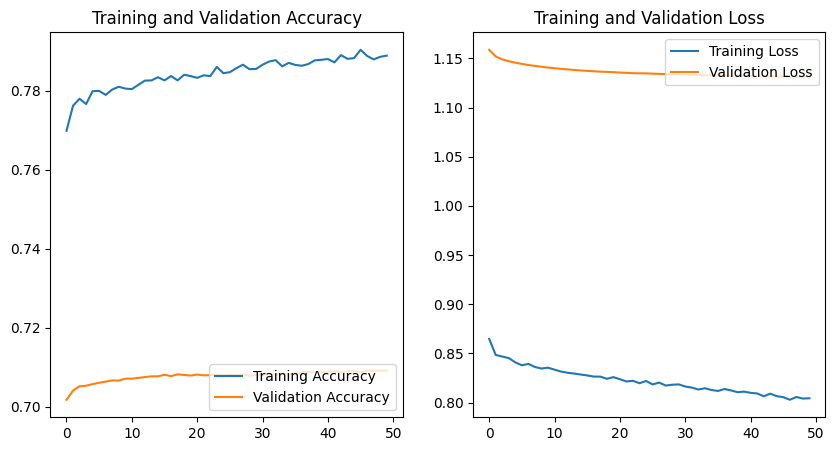

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_fine_tune.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_fine_tune.history['loss'], label='Training Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('efficientnet1.png')
plt.show()

In [20]:
model.save('model_efB0.h5')